<a href="https://colab.research.google.com/github/godot107/Colaboratory/blob/main/Loan_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projects/Conext:
- https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement 

Goals:
1. Predict the outcome of loan assignment based on applicant's information


Research/Resources:
1. https://www.kaggle.com/vikasukani/loan-eligibility-prediction-machine-learning 
2. https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
3. https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn
4. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
5. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
6. https://keras.rstudio.com/reference/fit.html
7. https://elitedatascience.com/exploratory-analysis
8. https://stackoverflow.com/questions/29530355/plotting-multiple-histograms-in-grid
9. https://seaborn.pydata.org/examples/many_pairwise_correlations.html

Future Endeavor: 
1.  Reduce Overfitting to the test set.  See the graph of training loss vs test loss


In [ ]:
# Import Libraries

from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
import seaborn as sns; sns.set_theme()

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Loan Project

# Import dataset:
data = pd.read_csv("train_ctrUa4K.csv")


Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1UtTS2X5XO9NOXRfhBLmD2K8ObG4AT986/Colab Notebooks/Loan Project


Pre-processing

In [ ]:
# Pre-processing
data = data.replace({'3+': '3'})
data = data.dropna()

Exploratory Data Analysis

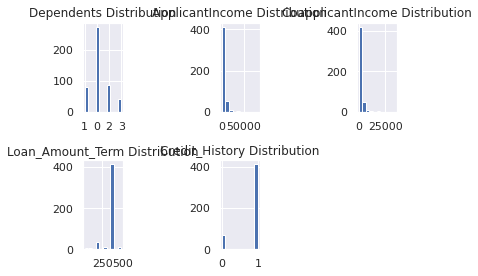

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


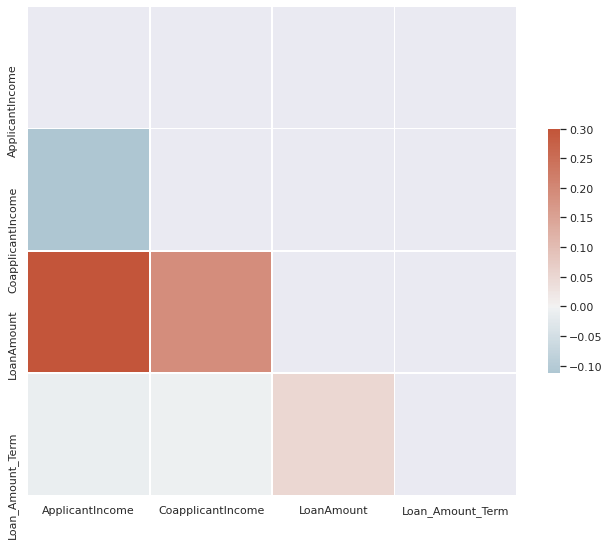

In [ ]:
# Histogram

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

variables = ['Dependents','ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term','Credit_History']
draw_histograms(data, variables, 2, 3)

#correlation plot
corr = data[['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Summary
data.describe()

In [ ]:
# Scaling

feature_col = ['Gender', 'Married','Self_Employed','Education','Property_Area','Loan_Status']
le = LabelEncoder()
for col in feature_col:
    data[col] = le.fit_transform(data[col])

scaler_col = ['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term']
scaler = StandardScaler()

data[scaler_col] = scaler.fit_transform(data[scaler_col])


X = data.iloc[:,1:12]
X = np.asarray(X).astype(np.float32) # this conversion allows the model to fit against with the training set.

y = data.iloc[:,12]


In [ ]:
# Feature Selection

In [ ]:
# Split dataset
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [ ]:
# Build Neural Network
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(12, input_dim=11, activation='relu')) 
  model.add(layers.Dropout(.1))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(.1))
  model.add(layers.Dense(1, activation='sigmoid'))

  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
# create model
model = KerasClassifier(build_fn=build_model, nb_epoch=150, batch_size=10, verbose=0)

# Fit the model
history = model.fit(X_train, y_train,epochs=150, batch_size=10, validation_data = (X_test, y_test))

In [ ]:
# Predict
predictions = model.predict(X_test) 

In [ ]:
# Evaluate the Model:

# Accuracy Score
print(accuracy_score(predictions, y_test))

# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed) 
results = cross_val_score(model, X_test, y_test, cv=kfold)
print(results)

# Available history callbacks
print(history.history.keys())

In [ ]:
# Results Visualization:

# Loss Evaluation
training_loss = history.history["loss"]
test_loss = history.history['val_loss']

epoch_count = range(1,len(training_loss) + 1)

plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss","Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

# Accuracy Evaluation
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

epoch_count = range(1,len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy","Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show();


In [ ]:
#Sandbox Cell


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
5,5417,4196.0,267.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0
